<a href="https://colab.research.google.com/github/ImmanuelNK/Exercise-DATAMINING/blob/main/%5BQuestion%5D_Exercise_Week_3_Pandas_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [1]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [2]:
#1me
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv")
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [3]:
#2
df.info()

#conclusion
#it shows the datatype in every columns and how much the non null values in the columns
#for example we can see that column of application_id have 6194 values that haven't zero values and the datatype is Integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [4]:
#3a
admission_counts = df['admission'].value_counts(dropna=False)
print(admission_counts)

admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [5]:
#3b
race_counts = df['race'].value_counts(dropna=False)
print(race_counts)

race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [6]:
#4
df['admission'].fillna('deny',inplace=True)
df['race'].fillna('other', inplace=True)

print(df)

      application_id  gender  international   gpa       major      race  \
0                  1  Female          False  3.30    Business     Asian   
1                  2    Male          False  3.28  Humanities     Black   
2                  3  Female           True  3.30    Business     other   
3                  4    Male          False  3.47        STEM     Black   
4                  5    Male          False  3.35        STEM  Hispanic   
...              ...     ...            ...   ...         ...       ...   
6189            6190    Male          False  3.49    Business     White   
6190            6191    Male          False  3.18        STEM     Black   
6191            6192  Female           True  3.22    Business     other   
6192            6193    Male           True  3.36    Business     other   
6193            6194    Male          False  3.23        STEM  Hispanic   

       gmat  work_exp          work_industry admission  
0     620.0       3.0     Financial Servic

<ipython-input-6-12bd687c2a1c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('deny',inplace=True)
<ipython-input-6-12bd687c2a1c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

5. recheck missing value

In [7]:
df.isnull().sum()
df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,deny
2,3,Female,True,3.30,Business,other,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,deny
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,deny
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,deny
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,deny
6191,6192,Female,True,3.22,Business,other,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,other,590.0,5.0,Other,deny


6. drop application_id column

In [8]:
# 6
df = df.drop(columns=['application_id'])

7. show describe column and conclude what the insight is from that column

In [9]:
#7
df.describe()

#conclusion
#it shows the description of the data like we can see the mean, the standard deviation, the values of the median, the minimum values, the maximum values, and etc
#by using describe it can helping us to understand the data distribution

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

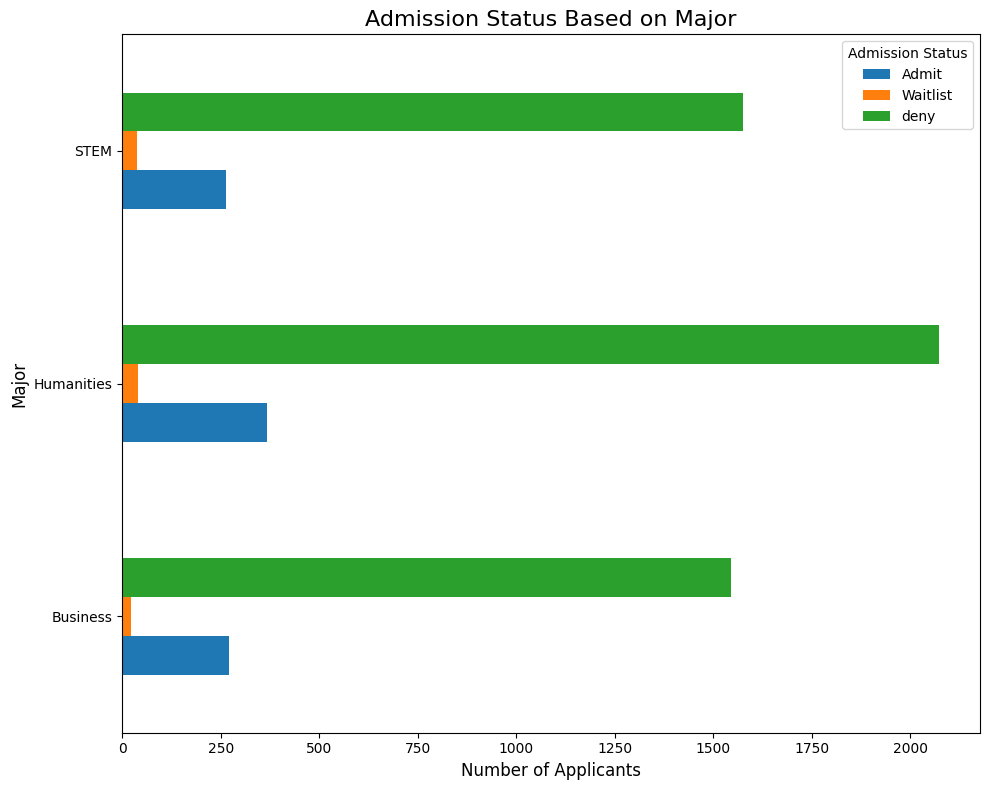

In [10]:
#8
import seaborn as sns
admission_data = df.dropna(subset=['admission'])
admission_by_major = pd.crosstab(admission_data['major'], admission_data['admission'])
admission_by_major.plot(kind='barh', stacked=False, figsize=(10, 8))

plt.title('Admission Status Based on Major', fontsize=16)
plt.xlabel('Number of Applicants', fontsize=12)
plt.ylabel('Major', fontsize=12)
plt.legend(title='Admission Status')

plt.tight_layout()
plt.show()

#by visualize the data using bar plot we can see that many people who applicant the STEM Major is deny or tidak masuk, and then just a several people who on waiting list and admit or terima
#by visualize the data too we can see the states of people that applicant in the severals major

:9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

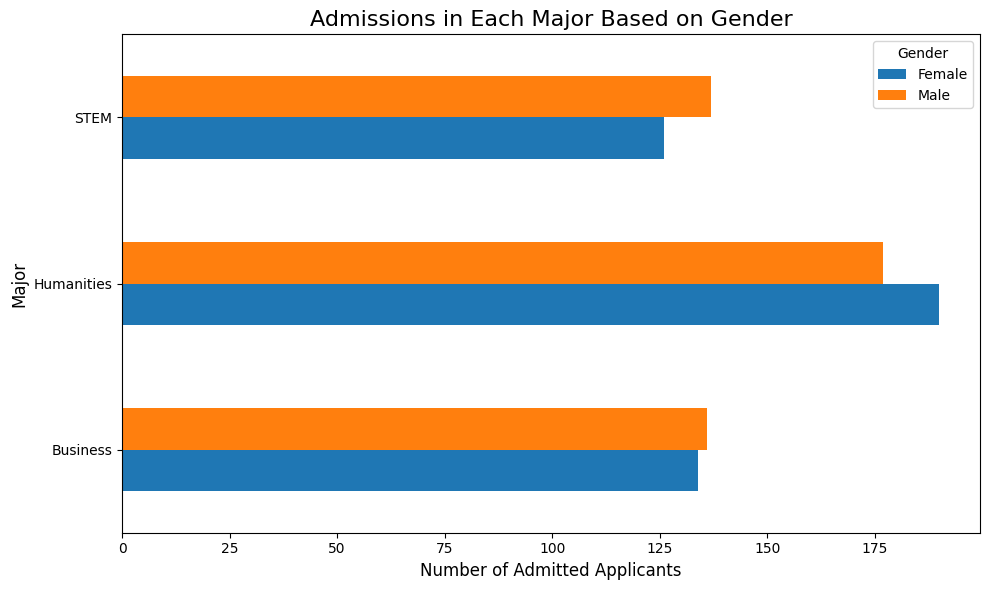

In [11]:
#9
admission_data = df.dropna(subset=['admission'])

admitted_data = admission_data[admission_data['admission'] == 'Admit']

admission_by_major_gender = pd.crosstab(admitted_data['major'], admitted_data['gender'])

if admission_by_major_gender.empty:
    print("The crosstab is empty. Check your data for admissions.")
else:
    # Plot the horizontal bar chart
    admission_by_major_gender.plot(kind='barh', stacked=False, figsize=(10, 6))

    # Set title and labels
    plt.title('Admissions in Each Major Based on Gender', fontsize=16)
    plt.xlabel('Number of Admitted Applicants', fontsize=12)
    plt.ylabel('Major', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title='Gender')

    # Show the plot
    plt.tight_layout()
plt.show()

#we can conclude that male in STEM Major more than female and etc
#and we can conclude male in humanities major more than female

10. create your own insightful visualization and explain it in at least 2 sentences

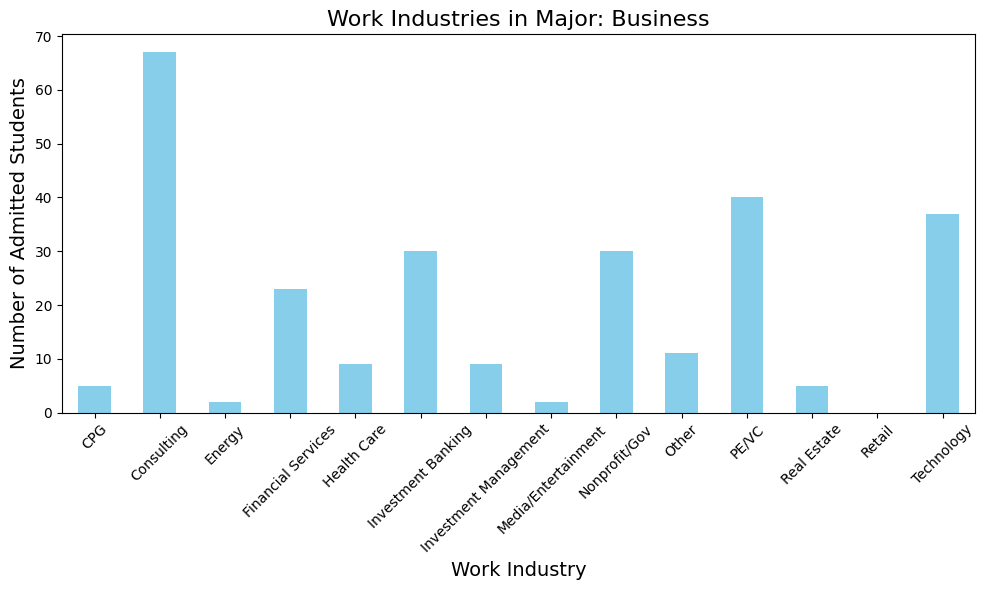

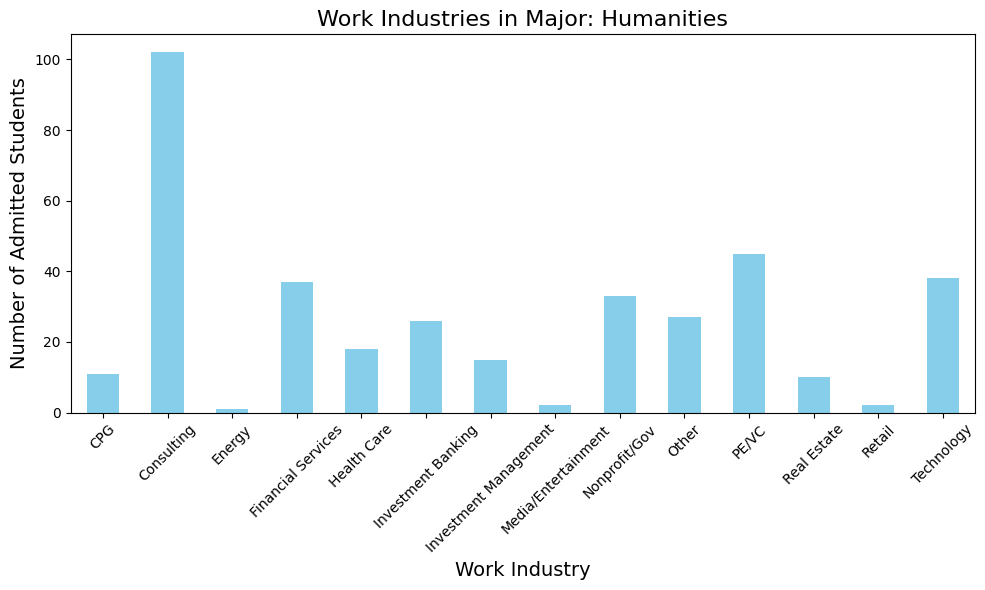

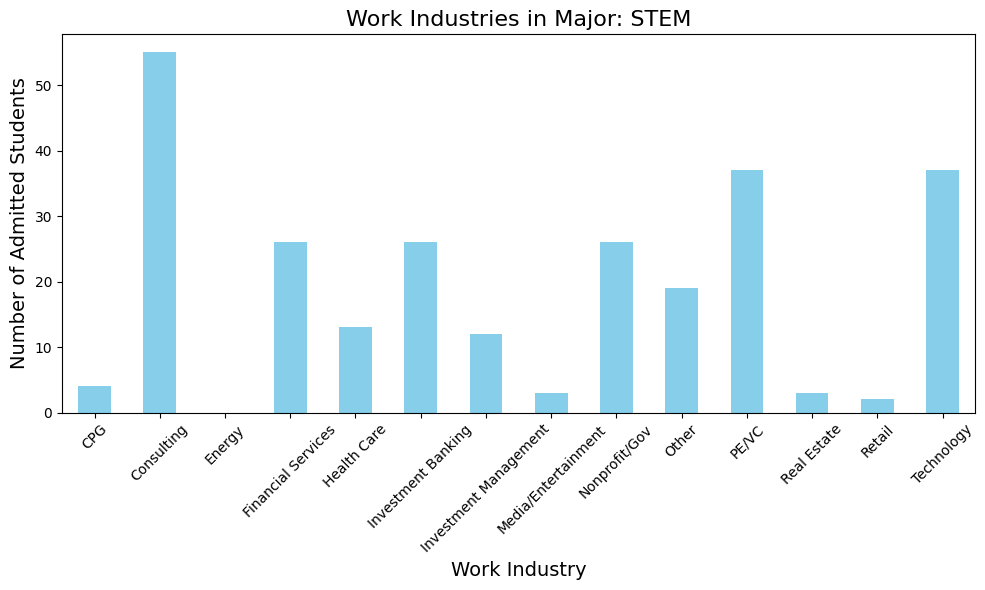

In [12]:
#10
admission_data = df.dropna(subset=['admission'])
admitted_data = admission_data[admission_data['admission'] == 'Admit']
admission_by_major_work_industry = pd.crosstab(admitted_data['major'],
admitted_data['work_industry'])

if admission_by_major_work_industry.empty:
    print("The crosstab is empty. Check your data for admissions.")
else:
    # Plot a bar chart for each major
    for major in admission_by_major_work_industry.index:
        admitted_counts = admission_by_major_work_industry.loc[major]

        # Create a bar chart
        plt.figure(figsize=(10, 6))
        admitted_counts.plot(kind='bar', color='skyblue')

        # Customize the plot
        plt.title(f'Work Industries in Major: {major}', fontsize=16)
        plt.xlabel('Work Industry', fontsize=14)
        plt.ylabel('Number of Admitted Students', fontsize=14)
        plt.xticks(rotation=45)
        plt.tight_layout()  # To ensure the labels fit nicely

        # Show the bar chart
        plt.show()

#conclusion
#we can concude that the most number of studdent that admitted in the major business work in industries of Consulting
##we can concude that the least number of studdent that admitted in the major business work in industries of retail


11. create your own insightful visualization and explain it in at least 2 sentences

<ipython-input-13-0336042a7e83>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admitted_data['gpa_category'] = admitted_data['gpa'].apply(lambda x: 'Above 3.5' if x > 3.5 else 'Below 3.5')


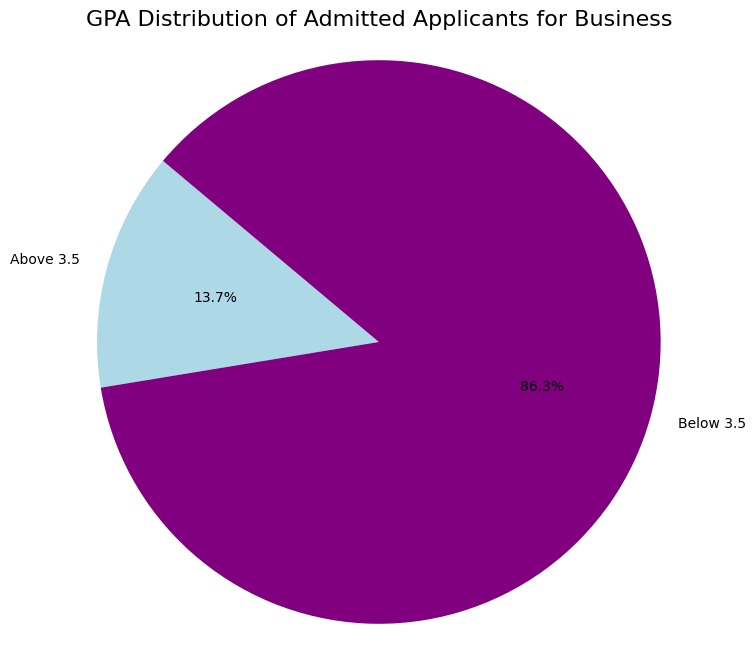

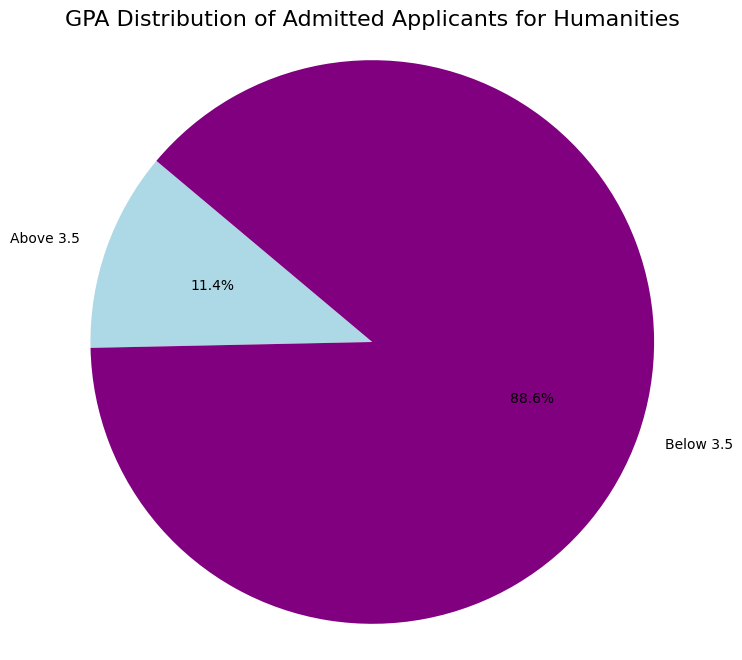

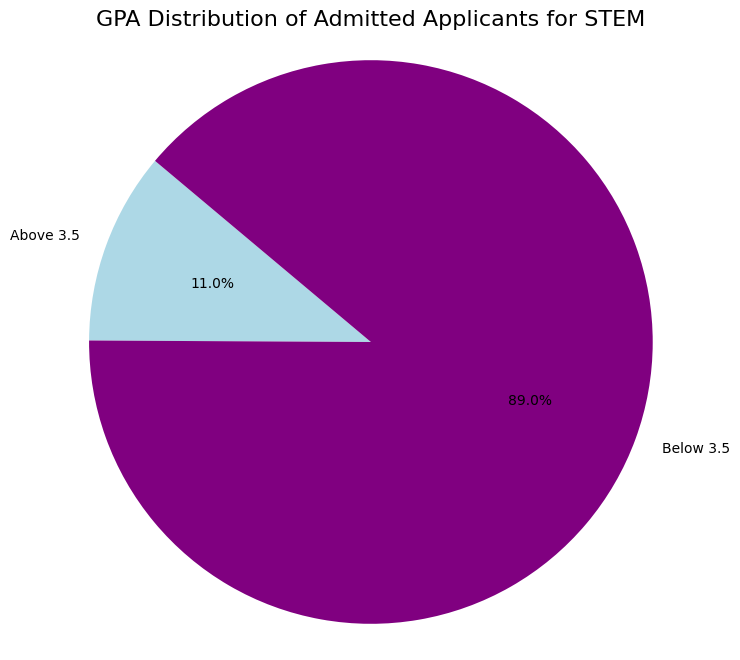

In [13]:
#11
admission_data = df.dropna(subset=['admission'])

# Filter for admitted students
admitted_data = admission_data[admission_data['admission'] == 'Admit']

# Create a new column to categorize GPA as Above 3.5 or Below 3.5
admitted_data['gpa_category'] = admitted_data['gpa'].apply(lambda x: 'Above 3.5' if x > 3.5 else 'Below 3.5')

# Create a crosstab to analyze admission by major and GPA category
admission_by_major_gpa = pd.crosstab(admitted_data['major'], admitted_data['gpa_category'])

# Check if the crosstab is not empty before plotting
if admission_by_major_gpa.empty:
    print("The crosstab is empty. Check your data for admissions.")
else:
    # Create a pie chart for each major
    for major in admission_by_major_gpa.index:
        admitted_counts = admission_by_major_gpa.loc[major]

        # Create a pie chart for the current major
        plt.figure(figsize=(8, 8))
        plt.pie(admitted_counts, labels=admitted_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'purple'])

        # Add title and aspect ratio
        plt.title(f'GPA Distribution of Admitted Applicants for {major}', fontsize=16)
        plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

        plt.show()

#conclusion
#we can conclude that student who has gpa above 3.5 just 13.7% in major business
#we can conclude that student who has gpa below 3.5 just 86.3% in major business

12. encode categorical columns and display the results

In [14]:
#12a
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#encode X

X = df.drop('admission', axis=1)

columns = ['gender', 'international', 'major', 'race', 'work_industry']

label_encoders = {}
for col in columns:
    le = LabelEncoder()
    X[col] = LabelEncoder().fit_transform(X[col])
    label_encoders[col] = le

df[columns] = X[columns]

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,deny
2,0,1,3.30,0,5,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,deny
4,1,0,3.35,2,2,590.0,5.0,1,deny


In [15]:
#12b
#encode y

df['admission'] = df['admission'].astype(str)
label_encoder = LabelEncoder()
df['admission_encoder'] = label_encoder.fit_transform(df['admission'])
print(df[['admission', 'admission_encoder']])

     admission  admission_encoder
0        Admit                  0
1         deny                  2
2        Admit                  0
3         deny                  2
4         deny                  2
...        ...                ...
6189      deny                  2
6190      deny                  2
6191     Admit                  0
6192      deny                  2
6193      deny                  2

[6194 rows x 2 columns]


13. create a heatmap to see the correlation and explain the conclusion

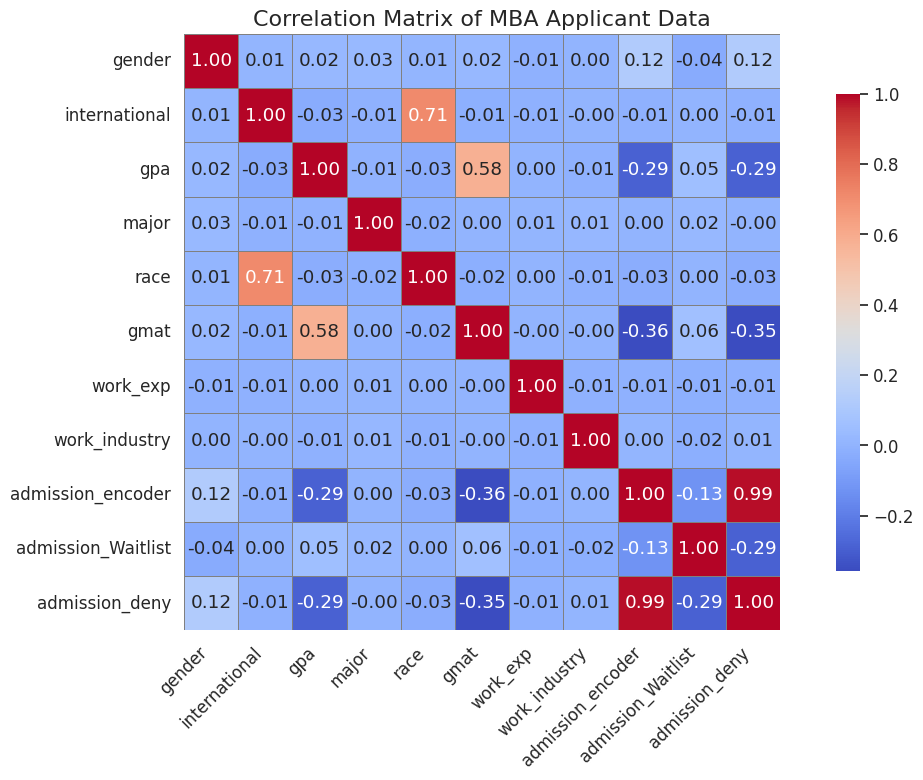

In [21]:
#13
import seaborn as sns
df_encoded = pd.get_dummies(df, drop_first=True)
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.1)
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
                       cbar_kws={"shrink": .8}, linewidths=.5, linecolor='gray')
plt.title('Correlation Matrix of MBA Applicant Data', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#Conclusion
#Secara keseluruhan, heatmap ini memberikan gambaran awal yang berharga tentang hubungan antara atribut pelamar dan hasil penerimaan,
#di mana beberapa fitur seperti GPA, skor GMAT, dan status penerimaan terlihat menjadi faktor utama dalam menentukan keputusan penerimaan.
#dengan menggunakan heatmap kita juga mengerti mengenai korelasi antar setiap variabel sehingga dapat digunakan untuk interpretasi data


**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Assuming logistic regression model
from sklearn.metrics import accuracy_score
#Challenge
average_gpa = df['gpa'].mean()

# Prepare Lisa's data
lisa_data = {
    'gender': 0,  # Assuming Lisa is female
    'international': 0,  # Local student
    'gpa': average_gpa,  # Average GPA
    'major': 0,  # Entrepreneurship
    'race': 0,  # Asian
    'gmat': 580.0,
    'work_exp': 2,  # 2018 to 2020
    'work_industry': 3
}


In [24]:
# Prepare features and target variable
X = df[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp','work_industry']]
y = df['admission']


In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Create a Decision Tree Classifier
model = DecisionTreeClassifier()


In [27]:

# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:

# Make predictions on the test set
y_pred = model.predict(X_test)

In [29]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.7836965294592413


In [30]:
# Prepare Lisa's data for prediction
lisa_df = pd.DataFrame([lisa_data])



In [31]:

# Predict acceptance for Lisa
prediction = model.predict(lisa_df)


In [32]:

# Output prediction
result = "Accepted" if prediction[0] == 1 else "Rejected"
print(f"Prediction for Lisa: {result}")

Prediction for Lisa: Rejected
